# 数据分析咖哥十话

## 第8话 劝君更进一杯酒：推荐系统找到好物

题解 本话题目“劝君更尽一杯酒”来自王维的《送元二使安西》。增长的重点不仅在于获客、激活和留存，
也要激发老用户的复购能力。而在推荐系统的作用之下，用户会买了又买，欲罢不能。



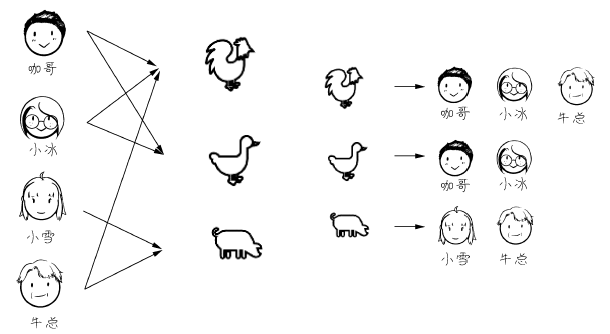!

<center>基于商品的协同过滤算法</center>

**详细内容请参考拙作：《数据分析咖哥十话》** 人民邮电出版社2022年出版

In [1]:
import pandas as pd #导入Pandas
import numpy as np #导入Numpy
df_games = pd.read_csv("游戏.csv") #读入数据
df_games #显示数据

,用户ID,游戏,行为,游戏时间
0,151603712,游戏4367,purchase,1.0
1,151603712,游戏4367,play,273.0
2,151603712,游戏1648,purchase,1.0
3,151603712,游戏1648,play,87.0
4,151603712,游戏4014,purchase,1.0
...,...,...,...,...
199995,128470551,游戏4611,play,1.5
199996,128470551,游戏1975,purchase,1.0
199997,128470551,游戏1975,play,1.5
199998,128470551,游戏3635,purchase,1.0


In [2]:
df_games['游戏'].value_counts() #游戏计数

游戏1333    9682
游戏4255    4646
游戏971     2789
游戏4820    2632
游戏2474    1752
          ... 
游戏55         1
游戏571        1
游戏4927       1
游戏4507       1
游戏4162       1
Name: 游戏, Length: 5101, dtype: int64

In [3]:
df_games['用户ID'].value_counts() #玩家计数

62990992     1573
33865373      949
11403772      906
30246419      901
47457723      855
             ... 
237789130       1
236193671       1
298020652       1
65438630        1
159983691       1
Name: 用户ID, Length: 12393, dtype: int64

In [4]:
user_game_matrix = df_games.pivot_table(index='用户ID', columns='游戏',  
                                                  values='游戏时间', aggfunc='sum')  #用pivot_table构建相关矩阵
user_game_matrix #输出相关矩阵

游戏,游戏10,游戏100,游戏1000,游戏1001,游戏1002,游戏1003,游戏1004,游戏1005,游戏1006,游戏1007,...,游戏990,游戏991,游戏992,游戏993,游戏994,游戏995,游戏996,游戏997,游戏998,游戏999
用户ID,,,,,,,,,,,,,,,,,,,,,
5250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144736,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309554670,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
309626088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
309812026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
user_game_matrix = user_game_matrix.applymap(lambda x: 1 if x > 0 else 0) #把NaN转换为0值
user_game_matrix #显示相关矩阵

游戏,游戏10,游戏100,游戏1000,游戏1001,游戏1002,游戏1003,游戏1004,游戏1005,游戏1006,游戏1007,...,游戏990,游戏991,游戏992,游戏993,游戏994,游戏995,游戏996,游戏997,游戏998,游戏999
用户ID,,,,,,,,,,,,,,,,,,,,,
5250,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76767,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
86540,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
103360,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
144736,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309554670,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
309626088,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
309812026,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
from sklearn.metrics.pairwise import cosine_similarity #导入cosine_similarity模块

In [7]:
user_user_sim_matrix = pd.DataFrame(cosine_similarity(user_game_matrix))  #构建用户相似度矩阵
user_user_sim_matrix #显示用户相似度矩阵

,0,1,2,3,4,5,6,7,8,9,...,12370,12371,12372,12373,12374,12375,12376,12377,12378,12379
0,1.000000,0.400066,0.313276,0.552052,0.617213,0.755929,0.671937,0.285299,0.699854,0.552052,...,0.125988,0.0,0.0,0.097590,0.218218,0.0,0.000000,0.0,0.218218,0.218218
1,0.400066,1.000000,0.239268,0.421637,0.471405,0.433013,0.416975,0.217900,0.400892,0.421637,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.166667,0.0,0.000000,0.000000
2,0.313276,0.239268,1.000000,0.279372,0.312348,0.286910,0.233778,0.226880,0.265627,0.279372,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.110432,0.0,0.000000,0.000000
3,0.552052,0.421637,0.279372,1.000000,0.894427,0.730297,0.608581,0.157500,0.845154,1.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
4,0.617213,0.471405,0.312348,0.894427,1.000000,0.816497,0.544331,0.176090,0.755929,0.894427,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12375,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.447214,0.000000,1.0,0.000000,0.0,0.000000,0.000000
12376,0.000000,0.166667,0.110432,0.000000,0.000000,0.000000,0.000000,0.062257,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,1.000000,0.0,0.000000,0.000000
12377,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,1.0,0.000000,0.000000
12378,0.218218,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.062257,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,1.000000,0.0,0.000000,0.0,1.000000,1.000000


In [8]:
user_user_sim_matrix.columns = user_game_matrix.index #将索引（用户ID）赋给列名
user_user_sim_matrix['用户ID'] = user_game_matrix.index #将索引（用户ID）赋给用户ID列
user_user_sim_matrix = user_user_sim_matrix.set_index('用户ID') #设置用户ID为行名（Dataframe的索引）
user_user_sim_matrix #显示用户相似度矩阵

用户ID,5250,76767,86540,103360,144736,181212,229911,298950,299153,381543,...,309262440,309265377,309375103,309404240,309434439,309554670,309626088,309812026,309824202,309903146
用户ID,,,,,,,,,,,,,,,,,,,,,
5250,1.000000,0.400066,0.313276,0.552052,0.617213,0.755929,0.671937,0.285299,0.699854,0.552052,...,0.125988,0.0,0.0,0.097590,0.218218,0.0,0.000000,0.0,0.218218,0.218218
76767,0.400066,1.000000,0.239268,0.421637,0.471405,0.433013,0.416975,0.217900,0.400892,0.421637,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.166667,0.0,0.000000,0.000000
86540,0.313276,0.239268,1.000000,0.279372,0.312348,0.286910,0.233778,0.226880,0.265627,0.279372,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.110432,0.0,0.000000,0.000000
103360,0.552052,0.421637,0.279372,1.000000,0.894427,0.730297,0.608581,0.157500,0.845154,1.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
144736,0.617213,0.471405,0.312348,0.894427,1.000000,0.816497,0.544331,0.176090,0.755929,0.894427,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309554670,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.447214,0.000000,1.0,0.000000,0.0,0.000000,0.000000
309626088,0.000000,0.166667,0.110432,0.000000,0.000000,0.000000,0.000000,0.062257,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,1.000000,0.0,0.000000,0.000000
309812026,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,1.0,0.000000,0.000000


In [9]:
user_user_sim_matrix.loc[86540].sort_values(ascending=False) #给用户86540的相似度列表降序排列

用户ID
86540        1.000000
54637394     0.416516
30440303     0.413350
58931437     0.406329
24721232     0.352329
               ...   
152019326    0.000000
152082114    0.000000
152133307    0.000000
152133579    0.000000
309903146    0.000000
Name: 86540, Length: 12380, dtype: float64

In [10]:
user_a_list = user_game_matrix.loc[86540] # 用户86450 的游戏列表
user_a_games = user_a_list.to_numpy().nonzero() ## 用户86450 玩过或购买过的游戏
user_a_games # 输出数据

(array([ 130,  185,  264,  266,  268,  269,  297,  299,  301,  696,  707,
         731,  925, 1089, 1101, 1180, 1181, 1183, 1187, 1190, 1236, 1237,
        1238, 1530, 1598, 1623, 1838, 2241, 2242, 2280, 2283, 2284, 2415,
        2444, 2455, 2456, 2457, 2467, 2560, 2561, 2753, 2782, 2949, 2950,
        2951, 2952, 2954, 3021, 3022, 3023, 3024, 3025, 3026, 3027, 3031,
        3041, 3165, 3450, 3461, 3472, 3483, 3494, 3576, 3697, 3698, 3699,
        3701, 3869, 3979, 3980, 3982, 4029, 4048, 4122, 4188, 4284, 4287,
        4288, 4289, 4492, 4684, 5066], dtype=int64),)

In [12]:
user_a_gameset = set(user_a_list.iloc[user_a_games].index) # 游戏名称的集合
user_a_gameset # 输出数据

{'游戏1117',
 '游戏1167',
 '游戏1239',
 '游戏1240',
 '游戏1242',
 '游戏1243',
 '游戏1269',
 '游戏1270',
 '游戏1272',
 '游戏163',
 '游戏164',
 '游戏1661',
 '游戏1838',
 '游戏199',
 '游戏200',
 '游戏2071',
 '游戏2072',
 '游戏2074',
 '游戏2078',
 '游戏2080',
 '游戏2121',
 '游戏2122',
 '游戏2123',
 '游戏2390',
 '游戏2451',
 '游戏2474',
 '游戏2670',
 '游戏3042',
 '游戏3043',
 '游戏3078',
 '游戏3080',
 '游戏3081',
 '游戏320',
 '游戏3227',
 '游戏3238',
 '游戏3239',
 '游戏324',
 '游戏325',
 '游戏3334',
 '游戏3335',
 '游戏3509',
 '游戏3535',
 '游戏3686',
 '游戏3687',
 '游戏3688',
 '游戏3689',
 '游戏3690',
 '游戏3751',
 '游戏3752',
 '游戏3753',
 '游戏3754',
 '游戏3755',
 '游戏3756',
 '游戏3757',
 '游戏3760',
 '游戏377',
 '游戏3881',
 '游戏414',
 '游戏415',
 '游戏416',
 '游戏417',
 '游戏418',
 '游戏4256',
 '游戏4367',
 '游戏4368',
 '游戏4369',
 '游戏4370',
 '游戏4522',
 '游戏4622',
 '游戏4623',
 '游戏4625',
 '游戏4668',
 '游戏4685',
 '游戏4751',
 '游戏4811',
 '游戏4899',
 '游戏4900',
 '游戏4901',
 '游戏4902',
 '游戏5086',
 '游戏620',
 '游戏968'}

In [13]:
user_b_list = user_game_matrix.loc[54637394] # 用户54637394 的游戏列表
user_b_games = user_game_matrix.loc[54637394].to_numpy().nonzero() # 用户86450 玩过或购买过的游戏
user_b_gameset = set(user_a_list.iloc[user_b_games].index) # 游戏名称的集合
user_b_gameset # 输出数据

{'游戏1031',
 '游戏1098',
 '游戏1118',
 '游戏1129',
 '游戏1130',
 '游戏1143',
 '游戏1239',
 '游戏1240',
 '游戏1242',
 '游戏1280',
 '游戏1318',
 '游戏1321',
 '游戏1333',
 '游戏1596',
 '游戏1597',
 '游戏1598',
 '游戏1599',
 '游戏1601',
 '游戏1649',
 '游戏1887',
 '游戏2022',
 '游戏2071',
 '游戏2072',
 '游戏2073',
 '游戏2074',
 '游戏2075',
 '游戏2076',
 '游戏2078',
 '游戏2079',
 '游戏2080',
 '游戏2081',
 '游戏2121',
 '游戏2122',
 '游戏2123',
 '游戏220',
 '游戏2264',
 '游戏2341',
 '游戏2391',
 '游戏2395',
 '游戏2474',
 '游戏2598',
 '游戏2610',
 '游戏2649',
 '游戏2682',
 '游戏2683',
 '游戏2684',
 '游戏2723',
 '游戏2759',
 '游戏2774',
 '游戏2790',
 '游戏2960',
 '游戏2968',
 '游戏3000',
 '游戏3001',
 '游戏3127',
 '游戏3128',
 '游戏3129',
 '游戏3131',
 '游戏3227',
 '游戏3238',
 '游戏3239',
 '游戏3334',
 '游戏3335',
 '游戏3445',
 '游戏3447',
 '游戏3459',
 '游戏3543',
 '游戏3662',
 '游戏3686',
 '游戏3687',
 '游戏3688',
 '游戏3689',
 '游戏3690',
 '游戏3724',
 '游戏3751',
 '游戏3752',
 '游戏3753',
 '游戏3754',
 '游戏3755',
 '游戏3756',
 '游戏3757',
 '游戏3760',
 '游戏3787',
 '游戏3832',
 '游戏414',
 '游戏415',
 '游戏416',
 '游戏417',
 '游戏4175',
 '游戏418',
 '游戏4180',
 '游戏4

In [14]:
user_a_recommend_games = user_b_gameset - user_a_gameset # 找到给用户86450 推荐的游戏
user_a_recommend_games # 输出所推荐的游戏

{'游戏1031',
 '游戏1098',
 '游戏1118',
 '游戏1129',
 '游戏1130',
 '游戏1143',
 '游戏1280',
 '游戏1318',
 '游戏1321',
 '游戏1333',
 '游戏1596',
 '游戏1597',
 '游戏1598',
 '游戏1599',
 '游戏1601',
 '游戏1649',
 '游戏1887',
 '游戏2022',
 '游戏2073',
 '游戏2075',
 '游戏2076',
 '游戏2079',
 '游戏2081',
 '游戏220',
 '游戏2264',
 '游戏2341',
 '游戏2391',
 '游戏2395',
 '游戏2598',
 '游戏2610',
 '游戏2649',
 '游戏2682',
 '游戏2683',
 '游戏2684',
 '游戏2723',
 '游戏2759',
 '游戏2774',
 '游戏2790',
 '游戏2960',
 '游戏2968',
 '游戏3000',
 '游戏3001',
 '游戏3127',
 '游戏3128',
 '游戏3129',
 '游戏3131',
 '游戏3445',
 '游戏3447',
 '游戏3459',
 '游戏3543',
 '游戏3662',
 '游戏3724',
 '游戏3787',
 '游戏3832',
 '游戏4175',
 '游戏4180',
 '游戏4220',
 '游戏4255',
 '游戏4278',
 '游戏4316',
 '游戏441',
 '游戏443',
 '游戏4434',
 '游戏4528',
 '游戏4533',
 '游戏4820',
 '游戏4915',
 '游戏531',
 '游戏619',
 '游戏627',
 '游戏628',
 '游戏629',
 '游戏630',
 '游戏687',
 '游戏911',
 '游戏912',
 '游戏913',
 '游戏914',
 '游戏969',
 '游戏970',
 '游戏971',
 '游戏974'}

In [15]:
user_b_recommend_games = user_a_gameset - user_b_gameset # 找到给用户54637394 推荐的游戏
user_b_recommend_games # 输出所推荐的游戏

{'游戏1117',
 '游戏1167',
 '游戏1243',
 '游戏1269',
 '游戏1270',
 '游戏1272',
 '游戏163',
 '游戏164',
 '游戏1661',
 '游戏1838',
 '游戏199',
 '游戏200',
 '游戏2390',
 '游戏2451',
 '游戏2670',
 '游戏3042',
 '游戏3043',
 '游戏3078',
 '游戏3080',
 '游戏3081',
 '游戏320',
 '游戏324',
 '游戏325',
 '游戏3509',
 '游戏3535',
 '游戏377',
 '游戏3881',
 '游戏4367',
 '游戏4368',
 '游戏4369',
 '游戏4370',
 '游戏4622',
 '游戏4623',
 '游戏4625',
 '游戏4668',
 '游戏4685',
 '游戏4751',
 '游戏4811',
 '游戏5086',
 '游戏620'}

In [16]:
game_user_matrix = user_game_matrix.T #求转置矩阵
game_user_matrix #输出矩阵

用户ID,5250,76767,86540,103360,144736,181212,229911,298950,299153,381543,...,309262440,309265377,309375103,309404240,309434439,309554670,309626088,309812026,309824202,309903146
游戏,,,,,,,,,,,,,,,,,,,,,
游戏10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
游戏100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
游戏1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
游戏1001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
游戏1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
游戏995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
游戏996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
游戏997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
item_item_sim_matrix = pd.DataFrame(cosine_similarity(game_user_matrix)) #构建游戏相似度矩阵
item_item_sim_matrix #输出矩阵

,0,1,2,3,4,5,6,7,8,9,...,5091,5092,5093,5094,5095,5096,5097,5098,5099,5100
0,1.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.288675,...,0.000000,0.0,0.00000,0.066227,0.054554,0.0,0.000000,0.0,0.0,0.0
1,0.0,1.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.57735,0.000000,0.188982,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,1.000000,0.223607,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.00000,0.114708,0.000000,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.223607,1.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.00000,0.205196,0.084515,0.0,0.223607,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.000000,1.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.288675,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5096,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.00000,0.000000,0.000000,1.0,0.000000,0.0,0.0,0.0
5097,0.0,0.0,0.000000,0.223607,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.00000,0.000000,0.094491,0.0,1.000000,0.0,0.0,0.0
5098,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.00000,0.000000,0.000000,0.0,0.000000,1.0,0.0,0.0
5099,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.0,1.0,0.0


In [18]:
item_item_sim_matrix.columns = user_game_matrix.T.index #将索引（游戏名）赋给列名
item_item_sim_matrix['游戏'] = user_game_matrix.T.index #将索引（游戏名）赋给用户ID列
item_item_sim_matrix = item_item_sim_matrix.set_index('游戏') #设置游戏名为行名（Dataframe的索引）
item_item_sim_matrix.head() #显示游戏相似度矩阵

游戏,游戏10,游戏100,游戏1000,游戏1001,游戏1002,游戏1003,游戏1004,游戏1005,游戏1006,游戏1007,...,游戏990,游戏991,游戏992,游戏993,游戏994,游戏995,游戏996,游戏997,游戏998,游戏999
游戏,,,,,,,,,,,,,,,,,,,,,
游戏10,1.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.288675,...,0.000000,0.0,0.00000,0.066227,0.054554,0.0,0.000000,0.0,0.0,0.0
游戏100,0.0,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.57735,0.000000,0.188982,0.0,0.000000,0.0,0.0,0.0
游戏1000,0.0,0.0,1.000000,0.223607,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.00000,0.114708,0.000000,0.0,0.000000,0.0,0.0,0.0
游戏1001,0.0,0.0,0.223607,1.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.00000,0.205196,0.084515,0.0,0.223607,0.0,0.0,0.0
游戏1002,0.0,0.0,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,...,0.288675,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0


In [19]:
similar_game_a_recommend_games = item_item_sim_matrix.loc['游戏163'].sort_values(ascending=False)  #给某游戏的相似度列表降序排序
similar_game_a_recommend_games #显示列表

游戏
游戏163     1.000000
游戏164     0.695121
游戏165     0.377755
游戏168     0.280223
游戏917     0.261968
            ...   
游戏3121    0.000000
游戏313     0.000000
游戏3140    0.000000
游戏3143    0.000000
游戏3325    0.000000
Name: 游戏163, Length: 5101, dtype: float64

**就到这里！下面请大家自行设计出更棒的推荐系统**

推荐系统解决的两个核心问题：一是在信息过载的环境中，帮助用户获得自己需要的信息；
二是通过好的推荐增强用户的黏性并提高用户的消费频率，从而驱动增长。
因此推荐系统的核心价值在于精而准。
在这一话中，我们主要使用了相似度矩阵这一工具，生成了基于用户相似度和基于游戏相似
度的两个游戏推荐列表。
在优秀推荐系统的实现过程中还有很多的细节，如数据的实时提取和特征工程、召回层和排
序层的设计、推荐系统模型和算法的选择等。这些内容超出了本书所涵盖的范围。
不过，无论是简单还是复杂的推荐系统，其核心思路都是基于人或物的内在相关性为用户推
荐其需要的内容。拥有的内容（或商品）和用户越多，就越需要深入挖掘内容之间、用户之间，
以及内容和用户之间的相关性。